In [2]:
import tensorflow as tf
from tensorflow.keras import datasets , layers , models
import matplotlib.pyplot as plt
import numpy as np



In [3]:
(X_train, y_train), (X_test,y_test) = datasets.cifar10.load_data()
X_train.shape

170498071/170498071 [==============================] - 4s 0us/step


(50000, 32, 32, 3)

In [4]:
X_test.shape

(10000, 32, 32, 3)

In [5]:
y_train.shape

(50000, 1)

In [6]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [7]:
y_train = y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [8]:
y_test = y_test.reshape(-1,)

In [9]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [10]:
def plot_sample(X, y, index):
    plt.figure(figsize = (15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

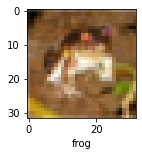

In [11]:
plot_sample(X_train, y_train, 0)

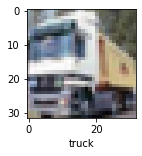

In [12]:
plot_sample(X_train, y_train, 1)

Normalising the training data

In [13]:
X_train = X_train / 255.0
X_test = X_test / 255.0

Build a CNN model


In [ ]:
1 architecture

In [17]:
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

2 architecture

In [22]:
cnn1 = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

3 architecture

In [23]:
cnn2 = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [18]:
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [24]:
cnn1.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [25]:
cnn2.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

We can see the accuracy of 12 epochs is upto 88 %

In [ ]:
cnn.fit(X_train, y_train, epochs=12)

Epoch 1/12
1563/1563 [==============================] - 67s 43ms/step - loss: 0.5799 - accuracy: 0.7958
Epoch 2/12
1563/1563 [==============================] - 70s 45ms/step - loss: 0.5464 - accuracy: 0.8083
Epoch 3/12
1563/1563 [==============================] - 67s 43ms/step - loss: 0.5143 - accuracy: 0.8199
Epoch 4/12
1563/1563 [==============================] - 69s 44ms/step - loss: 0.4862 - accuracy: 0.8299
Epoch 5/12
1563/1563 [==============================] - 69s 44ms/step - loss: 0.4570 - accuracy: 0.8379
Epoch 6/12
1563/1563 [==============================] - 69s 44ms/step - loss: 0.4311 - accuracy: 0.8471
Epoch 7/12
1563/1563 [==============================] - 69s 44ms/step - loss: 0.4098 - accuracy: 0.8541
Epoch 8/12
1563/1563 [==============================] - 68s 43ms/step - loss: 0.3834 - accuracy: 0.8643
Epoch 9/12
1563/1563 [==============================] - 71s 45ms/step - loss: 0.3591 - accuracy: 0.8715
Epoch 10/12
1563/1563 [==============================] - 68s 44m

In [27]:
cnn1.fit(X_train, y_train, epochs=2)

Epoch 1/2
1563/1563 [==============================] - 44s 28ms/step - loss: 1.0810 - accuracy: 0.6235
Epoch 2/2
1563/1563 [==============================] - 39s 25ms/step - loss: 1.0124 - accuracy: 0.6479


In [28]:
cnn2.fit(X_train, y_train, epochs=2)

Epoch 1/2
1563/1563 [==============================] - 82s 52ms/step - loss: 1.5718 - accuracy: 0.4244
Epoch 2/2
1563/1563 [==============================] - 73s 47ms/step - loss: 1.2197 - accuracy: 0.5653


In [19]:
cnn.evaluate(X_test,y_test)

313/313 [==============================] - 5s 13ms/step - loss: 2.3026 - accuracy: 0.0980


[2.3025641441345215, 0.09799999743700027]

In [29]:
cnn1.evaluate(X_test,y_test)

313/313 [==============================] - 3s 9ms/step - loss: 1.0915 - accuracy: 0.6267


[1.0915220975875854, 0.6266999840736389]

In [30]:
cnn2.evaluate(X_test,y_test)

313/313 [==============================] - 5s 15ms/step - loss: 1.1686 - accuracy: 0.5882


[1.16862154006958, 0.5881999731063843]

In [ ]:
y_pred = cnn.predict(X_test)
y_pred[:5]

313/313 [==============================] - 6s 18ms/step


array([[2.7984568e-06, 7.9895362e-06, 1.2312376e-05, 9.9622041e-01,
        5.8153088e-05, 2.2772090e-03, 1.4205362e-03, 2.7391565e-07,
        4.6554422e-07, 1.1327044e-08],
       [1.8269326e-06, 5.0113606e-03, 7.6466932e-08, 1.9414369e-10,
        1.2731359e-13, 3.3657894e-13, 1.2342529e-13, 3.2241601e-10,
        9.9478787e-01, 1.9878354e-04],
       [4.4657297e-02, 1.0545939e-02, 5.1937200e-04, 3.2635042e-03,
        1.1934693e-04, 3.9356892e-04, 2.4961117e-05, 2.1714140e-03,
        9.2969298e-01, 8.6115561e-03],
       [9.9837905e-01, 1.4420642e-09, 6.6115154e-04, 1.7083607e-05,
        3.9110652e-09, 3.9920737e-11, 4.3290180e-11, 6.8135934e-11,
        9.4271114e-04, 2.7561009e-09],
       [1.2982894e-12, 8.4791427e-09, 2.4148084e-04, 1.1860857e-03,
        7.6223491e-03, 6.6162465e-07, 9.9094945e-01, 2.5383592e-10,
        1.8184022e-11, 3.8889057e-12]], dtype=float32)

In [38]:
y_pred = cnn1.predict(X_test)
y_pred[:5]

313/313 [==============================] - 3s 9ms/step


array([[1.54400375e-02, 2.37719319e-03, 9.32159834e-03, 5.36989093e-01,
        3.68447183e-03, 1.36906520e-01, 9.14121345e-02, 9.16498364e-04,
        1.99850500e-01, 3.10185808e-03],
       [5.62700815e-02, 3.13071758e-01, 1.69209470e-05, 1.43177294e-06,
        1.30045908e-06, 5.21030579e-08, 7.91679895e-08, 5.14097508e-07,
        6.28094435e-01, 2.54334579e-03],
       [4.52697873e-01, 1.14624761e-01, 2.17035250e-03, 1.05020229e-03,
        2.37338128e-04, 1.42158970e-04, 1.54930749e-05, 6.32054813e-04,
        3.55720252e-01, 7.27093965e-02],
       [6.50951087e-01, 2.08478756e-02, 5.34792244e-03, 4.37312614e-04,
        1.90980511e-03, 3.24091743e-05, 3.37293255e-04, 5.40993293e-04,
        3.17975104e-01, 1.62032049e-03],
       [4.68435785e-04, 3.24107357e-03, 4.26049381e-02, 1.05561659e-01,
        3.74514610e-01, 6.71270415e-02, 4.00838375e-01, 6.25657733e-04,
        3.50640365e-03, 1.51174655e-03]], dtype=float32)

In [39]:
y_pred = cnn2.predict(X_test)
y_pred[:5]

313/313 [==============================] - 5s 15ms/step


array([[1.11229466e-02, 3.44748539e-03, 2.02500466e-02, 6.47999048e-01,
        4.66283271e-03, 1.63324416e-01, 6.16577268e-02, 1.61280786e-03,
        8.04907680e-02, 5.43198409e-03],
       [1.81784451e-01, 6.08318925e-01, 8.26342948e-05, 3.00048737e-06,
        1.67561211e-05, 1.65960910e-06, 1.83492398e-06, 9.08836810e-05,
        1.76716149e-01, 3.29836868e-02],
       [4.06771243e-01, 2.64711082e-01, 1.15672257e-02, 1.21233764e-03,
        3.71295959e-03, 9.81344259e-04, 5.47477801e-04, 5.27276844e-03,
        2.04349428e-01, 1.00874074e-01],
       [5.98353744e-01, 2.76809298e-02, 4.85237576e-02, 8.55344464e-04,
        3.16946697e-03, 1.79606868e-04, 7.49993837e-04, 1.37475668e-04,
        3.18383545e-01, 1.96623150e-03],
       [2.63593555e-03, 2.20521051e-03, 1.04519427e-01, 1.38932586e-01,
        2.04878315e-01, 4.95276004e-02, 4.94222909e-01, 1.87996146e-03,
        9.20269289e-04, 2.77683983e-04]], dtype=float32)

In [ ]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]

[3, 8, 8, 0, 6]

In [ ]:
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

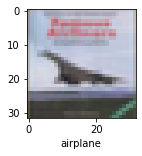

In [ ]:
plot_sample(X_test, y_test,3)

In [ ]:
classes[y_classes[3]]

'airplane'

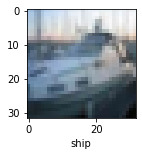

In [ ]:
plot_sample(X_test, y_test,2)

In [ ]:
classes[y_classes[2]]

'ship'

confusion matrix for cnn architecture

In [20]:
from sklearn.metrics import confusion_matrix , classification_report
import numpy as np
y_pred = cnn.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Report: \n", classification_report(y_test, y_pred_classes))

313/313 [==============================] - 4s 13ms/step
Classification Report: 
               precision    recall  f1-score   support

           0       0.00      0.00      0.00      1000
           1       0.10      0.86      0.17      1000
           2       0.12      0.00      0.01      1000
           3       0.14      0.07      0.09      1000
           4       0.00      0.00      0.00      1000
           5       0.00      0.00      0.00      1000
           6       0.00      0.00      0.00      1000
           7       0.13      0.04      0.06      1000
           8       0.06      0.01      0.02      1000
           9       0.00      0.00      0.00      1000

    accuracy                           0.10     10000
   macro avg       0.05      0.10      0.04     10000
weighted avg       0.05      0.10      0.04     10000



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


CM for cnn1 architecture

In [40]:
from sklearn.metrics import confusion_matrix , classification_report
import numpy as np
y_pred = cnn1.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Report: \n", classification_report(y_test, y_pred_classes))

313/313 [==============================] - 3s 8ms/step
Classification Report: 
               precision    recall  f1-score   support

           0       0.54      0.80      0.65      1000
           1       0.69      0.78      0.74      1000
           2       0.53      0.43      0.47      1000
           3       0.51      0.39      0.44      1000
           4       0.62      0.46      0.53      1000
           5       0.58      0.49      0.53      1000
           6       0.68      0.77      0.72      1000
           7       0.70      0.73      0.71      1000
           8       0.68      0.73      0.70      1000
           9       0.69      0.69      0.69      1000

    accuracy                           0.63     10000
   macro avg       0.62      0.63      0.62     10000
weighted avg       0.62      0.63      0.62     10000



CM for cnn2 architecture

In [41]:
from sklearn.metrics import confusion_matrix , classification_report
import numpy as np
y_pred = cnn2.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Report: \n", classification_report(y_test, y_pred_classes))

313/313 [==============================] - 5s 15ms/step
Classification Report: 
               precision    recall  f1-score   support

           0       0.50      0.76      0.60      1000
           1       0.73      0.70      0.71      1000
           2       0.47      0.44      0.45      1000
           3       0.56      0.21      0.30      1000
           4       0.59      0.42      0.49      1000
           5       0.52      0.53      0.53      1000
           6       0.63      0.73      0.68      1000
           7       0.58      0.73      0.65      1000
           8       0.72      0.63      0.67      1000
           9       0.62      0.72      0.67      1000

    accuracy                           0.59     10000
   macro avg       0.59      0.59      0.58     10000
weighted avg       0.59      0.59      0.58     10000

